<a href="https://colab.research.google.com/github/ilariacialfi/MushroomsClassification/blob/main/MushroomClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificazione della commestibilità dei funghi

Il progetto prende spunto da una tesi elaborata alla Philipps University di Marburg (Germania), il cui scopo era predire la commestibilità di un fungo sulla base di 20 caratteristiche del vegetale.

Il dataset utilizzato è [Secondary Mushroom Dataset](http://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset#) ed include *61069* ipotetici funghi con cappello basati su *173* specie (353 funghi per specie).
Ogni fungo viene classificato come:
* **e** (edible): commestibile
* **p** (poisonous): velenoso o di commestibilità sconosciuta e sconsigliata

Oltre a questi due attributi se ne aggiungono altri 20 che possono essere di tipo nominale (n) o metrico (m), e sono:



Attributo | Significato | valori
------ | ------ | ------
**cap-diameter** (m)| diametro del cappello | float in cm 
**cap-shape** (n)| forma del cappello | b=campana, c=conico, x=convesso, f=piatto, s=cavo, p=sferico, o=altro
**cap-surface** (n)| tipo di superficie del cappello | i=fibroso, g=con scanalature, y=squamoso, s=liscio, h=lucido, l=coriaceo, k=setoso, t=appiccicoso, w=rugoso, e=carnoso
**cap-color** (n)| colore del cappello | n=marrone, buff=b, g=grigio, r=verde, p=rosa, u=viola, e=rosso, w=bianco; y=giallo, l=blu, o=arancione, k=nero
**does-bruise-or-bleed** (n)| il cappello cambia colore ammaccandosi | camvia colore=t,no=f
**gill-attachment** (n)| attaccattura delle branchie| a=adnato, x=annesso, d=decorrente, e=libero, s=sinuso, p=poroso, f=none, ?=sconosciuto
**gill-spacing** (n)| spazio tra le branchie | c=vicine, d=distanti, f=none
**gill-color** (n)| colore delle branchie | tutti i "cap-color" + f=none
**stem-height** (m)| altezza dello stelo | float in cm
**stem-width** (m)| larghezza dello stelo | float in mm
**stem-root** (n)| inizio dello stelo | b=bulboso, s=gonfio, c=clava, u=coppa, e=uguale, z=rizomorfo, r=radicato
**stem-surface** (n)| superficie dello stelo | tutti i "cap-surface" + f=none
**stem-color** (n)| colore dello stelo | tutti i "cap-color" + f=none
**veil-type** (n)| tipo di velo | p=parziale, u=universale
**veil-color** (n)| colore del velo | tutti i "cap-color" + f=none
**has-ring** (n)| se ha o meno l'anello | t=con anello, f=none
**ring-type** (n)| tipo di anello | c=ragnatela, e=evanescente, r=svasato, g=scanalato, l=largo, p=pendente, s=guaina, z=zona, y=squamoso, m=mobile, f=none , ?=sconosciuto
**spore-print-color** (n)| colore delle spore | tutti i "cap-color" + f=none
**habitat** (n)| habitat naturale | g=erbe, l=foglie, m=prati, p=sentieri, h=brughiere, u=urbano, w=rifiuti, d=boschi
**season** (n)| stagioni | s=primavera, u=estate, a=autunno, w=inverno




Abbiamo quindi a che fare con un problema di classificazione binaria, per la quale verranno applicati e confrontati tra loro vari algoritmi di apprendimento supervisionato, quali:

* Logistic Regression
* Support Vector Machine
* K-Nearest Neighbors
* Multi-Layer Perceptron
* Random Forest
* AdaBoost


##Processamento dei dati


### Importazione delle librerie

Importo le librerie che sono necessarie al processamento dei dati. In particolare utilizzerò:
* **pandas** che offre funzioni matematiche e di analisi dei dati
* **numpy** necessaria per utilizzare funzioni matematiche in Python
* **seaborn**, basato su matplotlib, che permette quindi di visualizzare grafici statistici
* **matplotlib** anch'esso per la visualizzazione di grafici
* **sklearn** con funzioni utili all'apprendimento automatico


In [77]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
#from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, classification_report, confusion_matrix, roc_curve, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#stile grafici
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors) 
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

### Importazione del dataset


Il dataset viene importato da GitHub.

In [78]:
df = pd.read_csv('https://raw.githubusercontent.com/ilariacialfi/MushroomsClassification/main/MushroomDataset/secondary_data.csv', sep = ';')
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


Come possiamo notare la variabile target è la colonna **class** che contiene i valori p per velenoso ed e per edibile. 


###Controllo valori nulli

Controllo se ci sono colonne che contengono valori nulli ed in caso li sostituiscon con il carattere '-'.


In [79]:
null_ratio = df.isnull().sum()/df.shape[0]
null_table = pd.DataFrame(null_ratio.sort_values(ascending=False))
null_table.columns=['null ratio']
null_table

,null ratio
veil-type,0.947977
spore-print-color,0.895954
veil-color,0.878613
stem-root,0.843931
stem-surface,0.624277
gill-spacing,0.410405
cap-surface,0.231214
gill-attachment,0.161850
ring-type,0.040462
class,0.000000


I valori mancanti verranno sostituiti con il carattere '-'.

In [80]:
df.fillna('')
for column in df.columns:
   df[column]= df[column].replace('','-')
   df[column]= df[column].replace(np.nan,'-')

null_ratio = df.isnull().sum()/df.shape[0]
null_table = pd.DataFrame(null_ratio.sort_values(ascending=False))
null_table.columns=['valori nulli']
null_table.head()

,valori nulli
class,0.0
stem-root,0.0
habitat,0.0
spore-print-color,0.0
ring-type,0.0


###Distribuzione delle features


Per avere una visione migliore dei dati è stata utilizzata la funzione `countplot` di seaborn per visualizzare le occorrenze di ogni attributo. Separeremo le nostre features in due liste: 
* *categ* per le caratteristiche categoriche;
* *num* per le caratteristiche continue.
Per tracciare la distribuzione delle caratteristiche con seaborn useremo `distplot`.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           61069 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       61069 non-null  object 
 7   gill-spacing          61069 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             61069 non-null  object 
 12  stem-surface          61069 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             61069 non-null  object 
 15  veil-color         

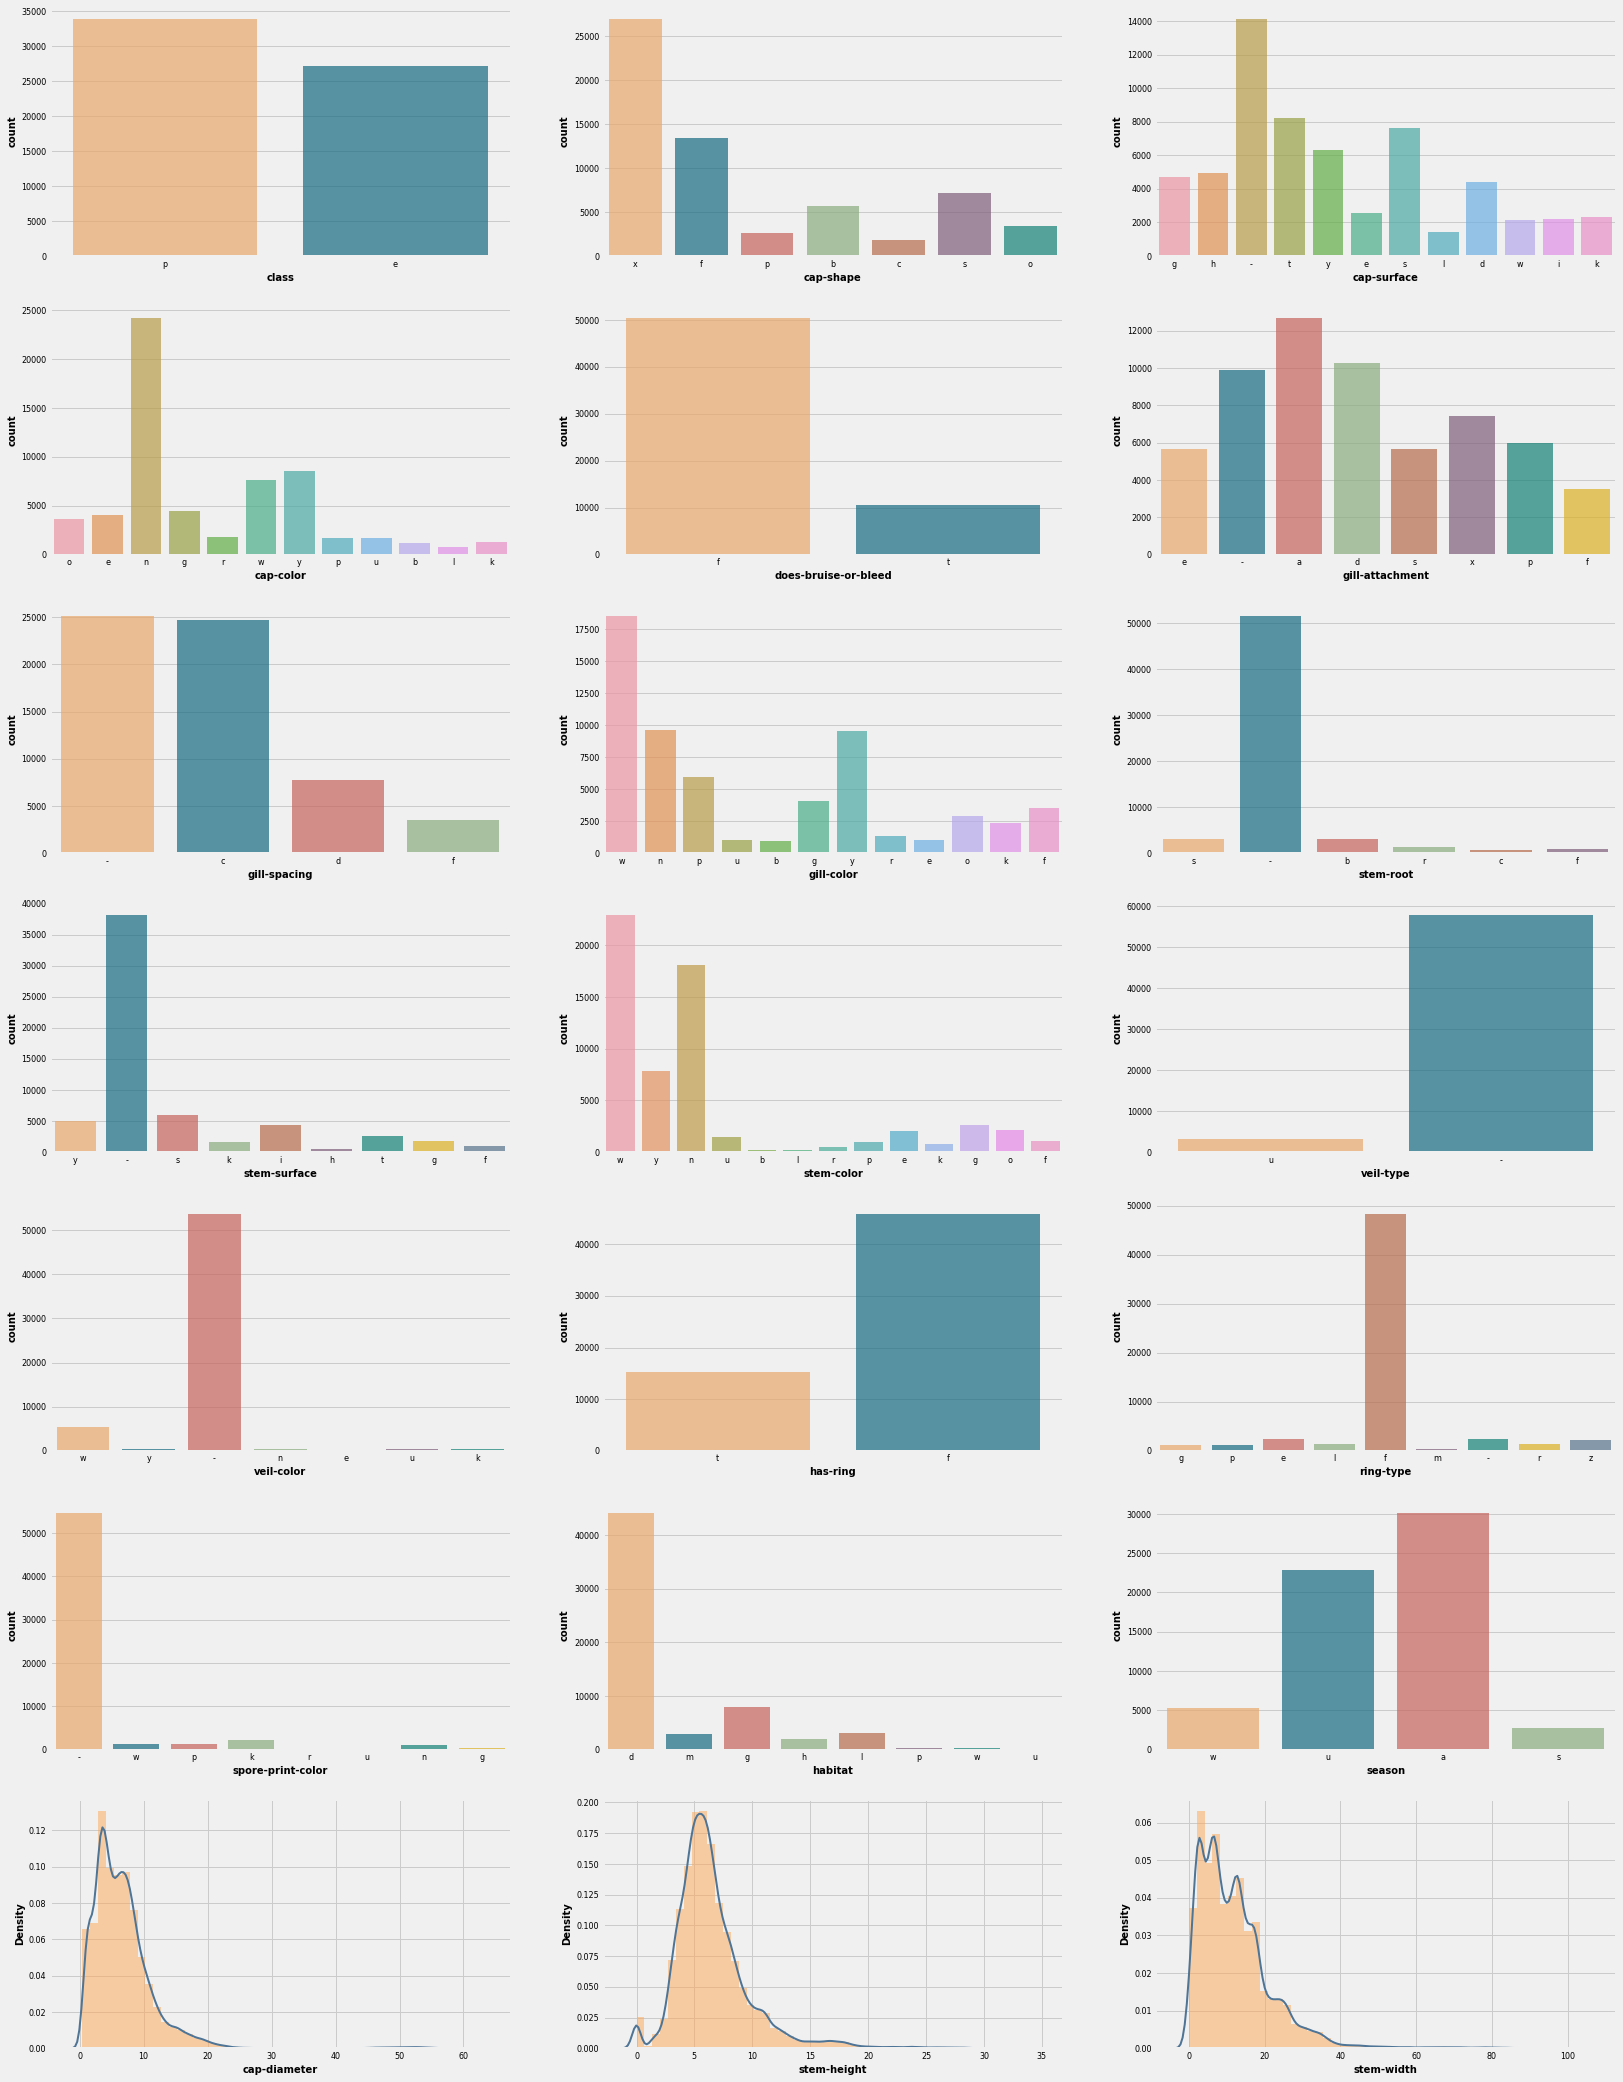

In [82]:
categ = []
num = []
for colmn in df.columns:
  if (df[colmn].dtype!=np.float64):
    categ.append(colmn)
  else:
    num.append(colmn)


fig = plt.figure(figsize=(25, 35))
for i in range (0,len(categ)):
    fig.add_subplot(7,3,i+1)
    sns.countplot(x=categ[i], data=df, alpha=.7) 

for col in num:
    fig.add_subplot(7,3,i+2)
    sns.distplot(df[col].dropna(), kde_kws={"lw": 2, "color":colors[8]}, 
                 hist_kws={"alpha": .5})
    i += 1
    
plt.show()

Dal primo subplot possiamo notare che c'è un buon **bilanciamento** tra le classi target, quindi non è necessario utilizzare metodi di ribilanciamento del dataset. Soprattutto è importante notare che, seppur di poco, sono maggiori i funghi velenosi, quindi la predizione avrà un po' più falsi positivi (funghi commestibili classificati come velenosi) rispetto ai falsi negativi (funghi velenosi classificati come commestibili). 
Mostriamo ora nuovamente i valori delle features, ma rispetto al valore target.

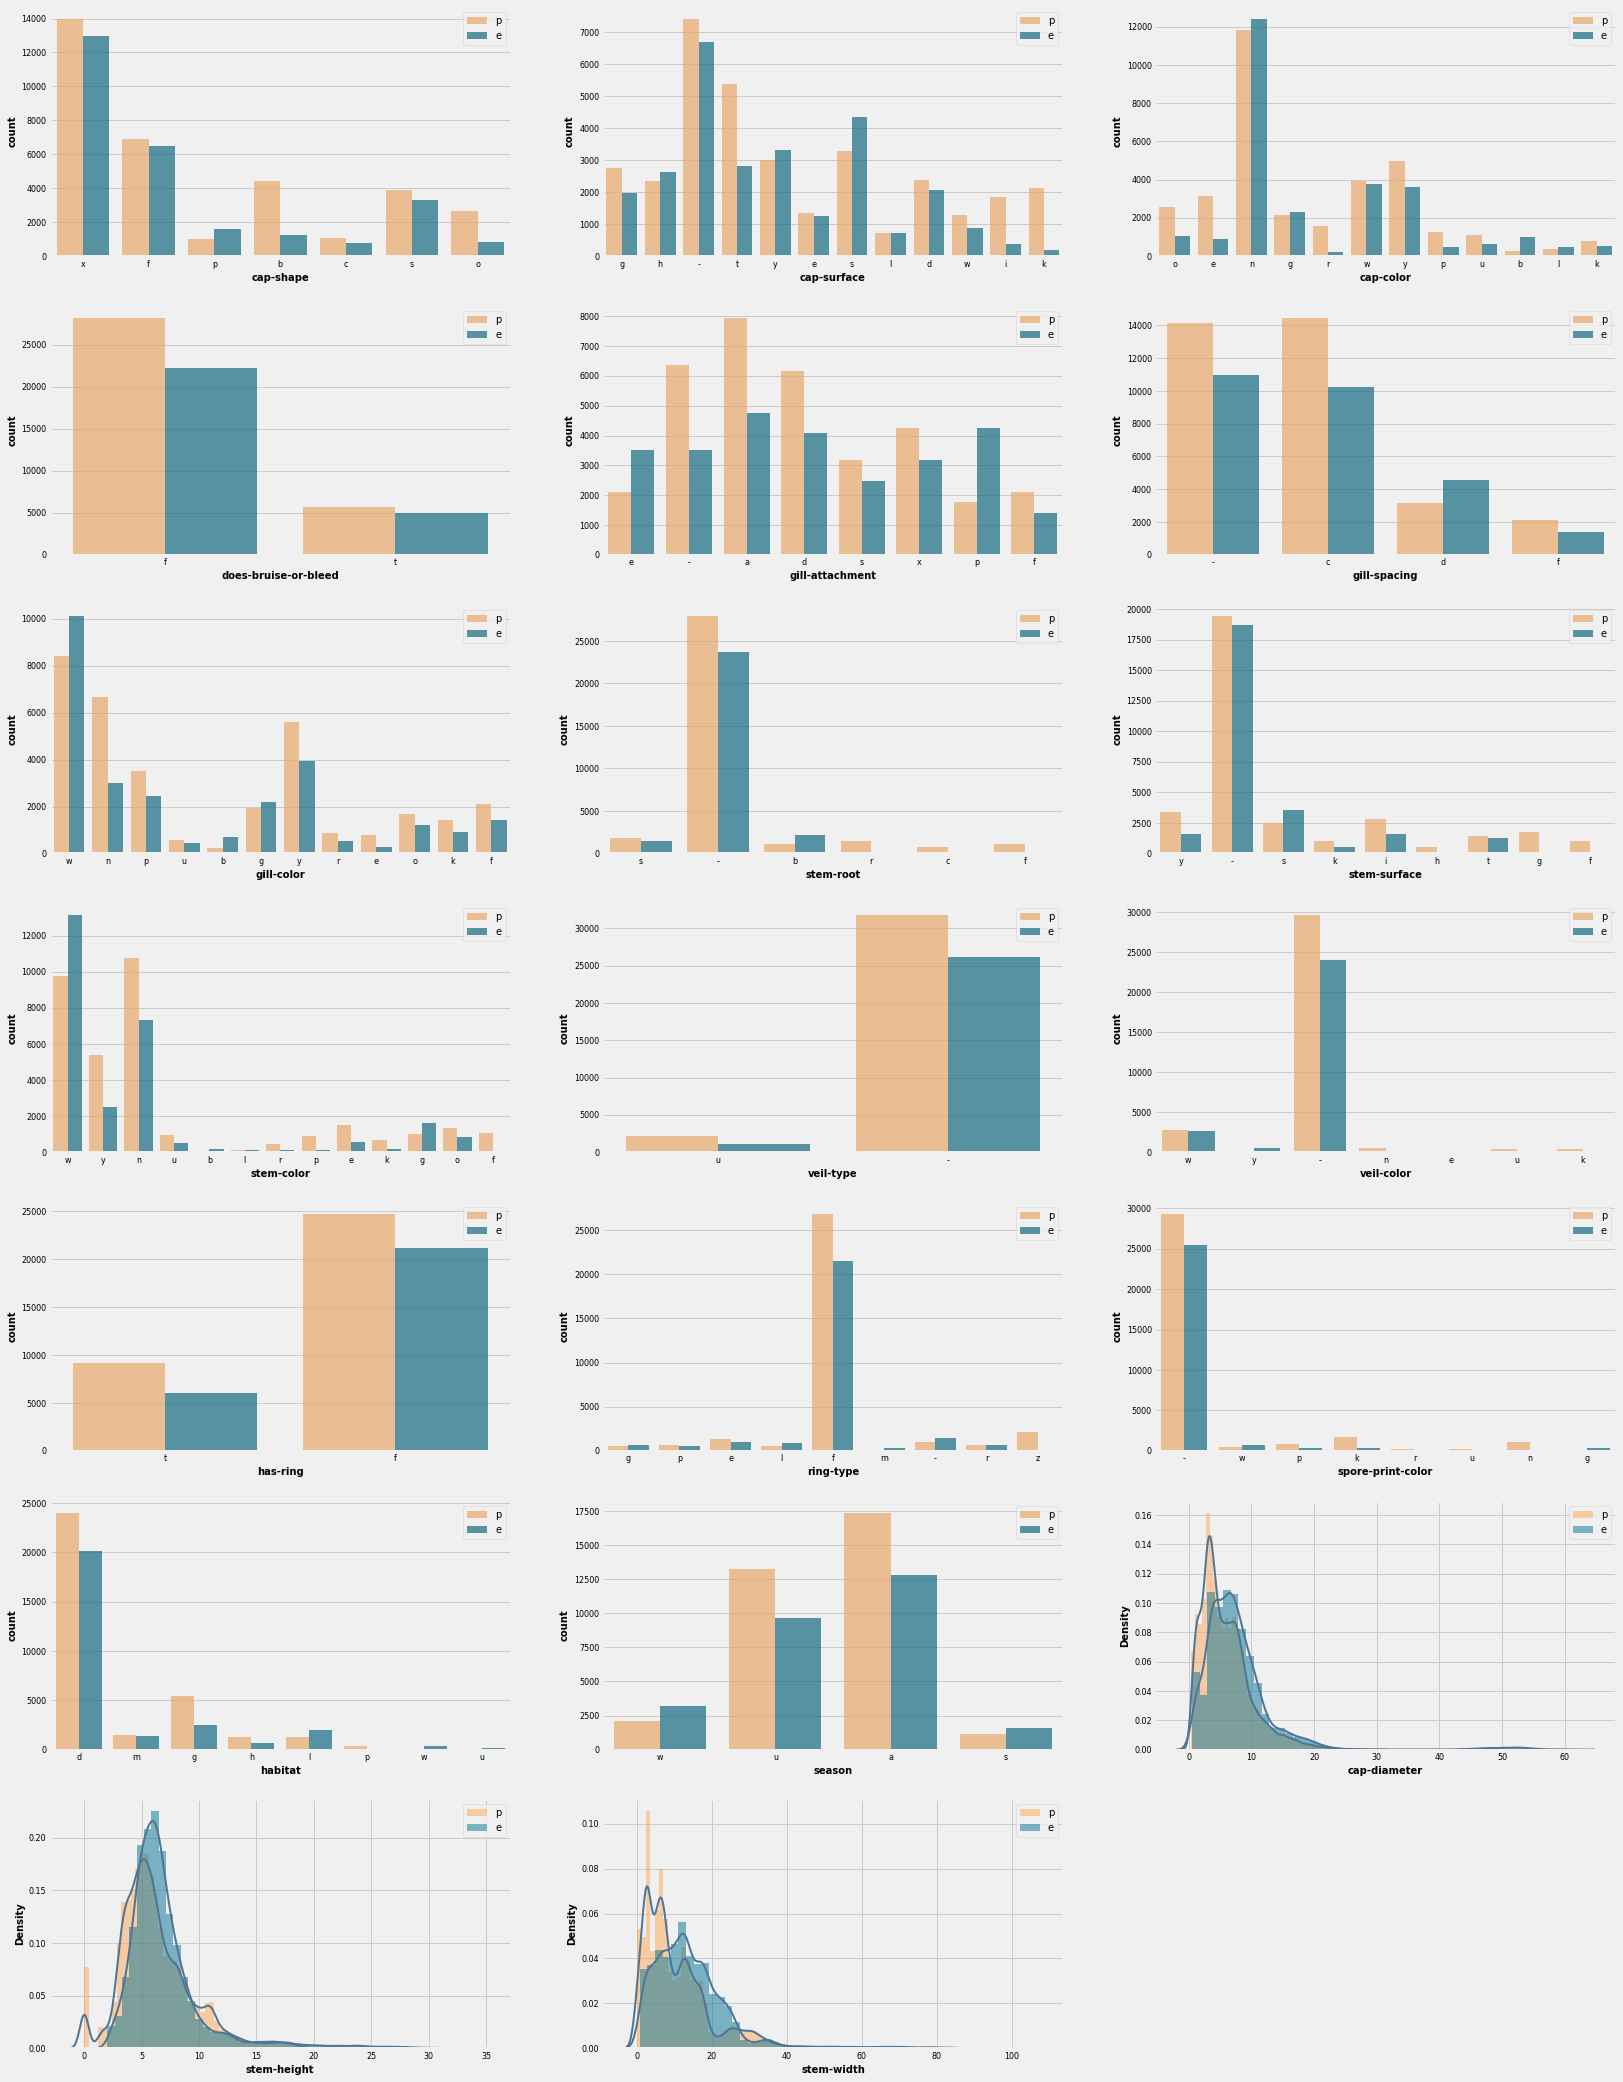

In [83]:
fig = plt.figure(figsize=(25, 35))
i = 1
for col in categ:
    if col != 'class':
        fig.add_subplot(7,3,i)
        g = sns.countplot(x=col, data=df,hue='class', alpha=.7)
        plt.legend(loc=1) 
        i += 1
for col in num:
    fig.add_subplot(7,3,i)
    sns.distplot(df[df['class']=='p'][col].dropna(), kde_kws={"lw": 2, "color":colors[8]}, 
                 hist_kws={"alpha": .5}, label='p')
    sns.distplot(df[df['class']=='e'][col].dropna(), kde_kws={"lw": 2, "color":colors[8]}, 
                 hist_kws={"alpha": .5}, label='e')
    i += 1
    plt.legend()

plt.show()

Da questa rappresentazione grafica è possibile notare che ci sono delle leggere differenze nei valori delle features tra i funghi velenosi e quelli commestibili, anche se non sono molto marcate.


###Rimozione Features

Andando ad analizzare le features che nel paragrafo precedente avevano mostrato una percentuale di valori nulli maggiore all'80% (veil-type, spore-print-color, veil-color, stem-root) notiamo che i pochi valori rimanenti sono distribuiti in maniera abbastanza equa tra le due classi, quindi è stato deciso di rimuoverle dal dataset.


In [84]:
df = df.drop(columns=["veil-type", "spore-print-color", "veil-color", "stem-root"])
print("Dimensione: ", df.shape[0])
print("Dimensionalità: ", df.shape[1]-1)

Dimensione:  61069
Dimensionalità:  16



Per quanto riguarda le variabili continue è utile anche andare a visualizzare il violin plot.

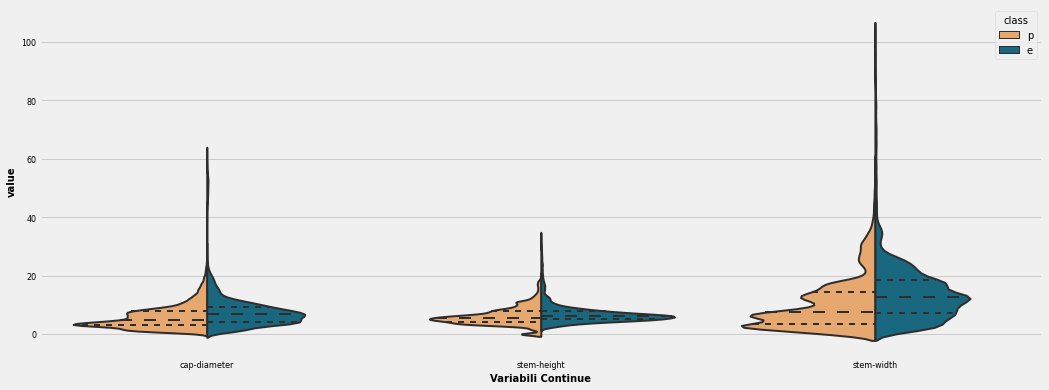

In [85]:
df_melt = pd.melt(df[['cap-diameter','stem-height','stem-width','class']], "class", var_name='Variabili Continue')
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Variabili Continue", y="value", hue="class", split = True, data=df_melt, inner = 'quartile',  alpha=.7, saturation=.7)

Le tre features sono distribuite tra i valori 0 e 20 circa, e le distribuzioni sembrano molto simili sia nel caso di funghi velenosi che di funghi commestibili.

###Eliminazione valori ridondanti

Utilizziamo la funzione di pandas `drop_duplicates()` per rimuovere le righe duplicate all'interno del dataset.

In [86]:
shape_original = df.shape[0]
print("Dimensione originale: ", df.shape[0])
df = df.drop_duplicates() 
print("Dimensione senza duplicati: ",df.shape[0])
diff = shape_original-df.shape[0]
print("Righe eliminate: ", diff)

Dimensione originale:  61069
Dimensione senza duplicati:  60923
Righe eliminate:  146


###Conversione valori categorici

Sappiamo già dall'introduzione al database che contiene diverse variabili categoriche. Scikit-learn, lo strumento per l'apprendimento che stiamo utilizzando, richiede che tutti i dati siano numerici, quindi è necessario convertire tutti i dati categotici.


In [87]:
labelencoder=LabelEncoder()
for column in df.columns:
  if column in categ:
    df[column] = labelencoder.fit_transform(df[column])
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-surface,stem-color,has-ring,ring-type,habitat,season
0,1,15.26,6,3,6,0,3,0,10,16.95,17.09,8,11,1,3,0,3
1,1,16.60,6,3,6,0,3,0,10,17.99,18.19,8,11,1,3,0,2
2,1,14.07,6,3,6,0,3,0,10,17.80,17.74,8,11,1,3,0,3
3,1,14.17,2,4,1,0,3,0,10,15.77,15.98,8,11,1,6,0,3
4,1,14.64,6,4,6,0,3,0,10,16.53,17.20,8,11,1,6,0,3


Notiamo che i valori target si sono convertiti in questo modo:
* 1 = p, quindi velenoso
* 0 = e, quindi edibile

###Divisione Train e Test Set

Vado ora a suddividere il dataset in training set (70%) e test set (30%).

In [88]:
df_train, df_test = train_test_split(df,test_size=0.3,random_state=42)

#features matrix
x = df.drop(['class'], axis='columns')
x_train = df_train.drop(['class'], axis='columns')
x_test = df_test.drop(['class'], axis='columns')

#target vector
y = df['class'] 
y_train = df_train['class']
y_test = df_test['class']

###Standardizzazione del data set

Utilizzo la classe `StandardScaler` per standardizzare i valori delle features, cioè per ogni valore sottraggo la media e divido per la deviazione standard. In questo modo si hanno generalmente performance migliori a livello di apprendimento.

Per prima cosa andiamo a visualizzare l'intervallo delle features.

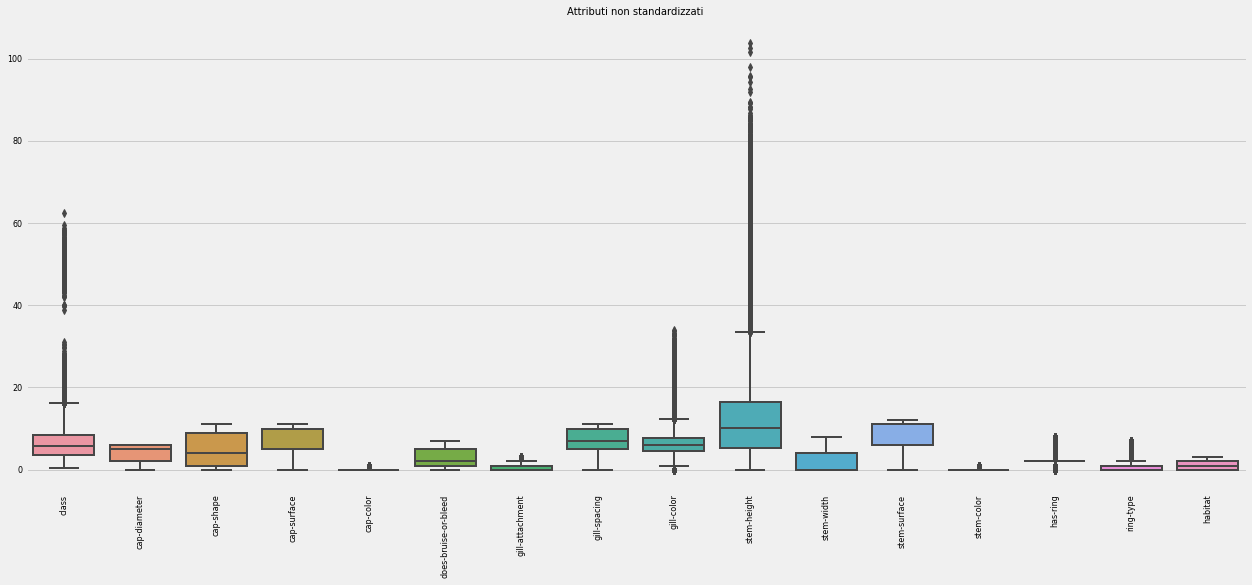

In [89]:
fig = sns.catplot(data=x , kind='box' , size=7, aspect=2.5).set(title='Attributi non standardizzati')
fig.set_xticklabels(df.columns,rotation=90)

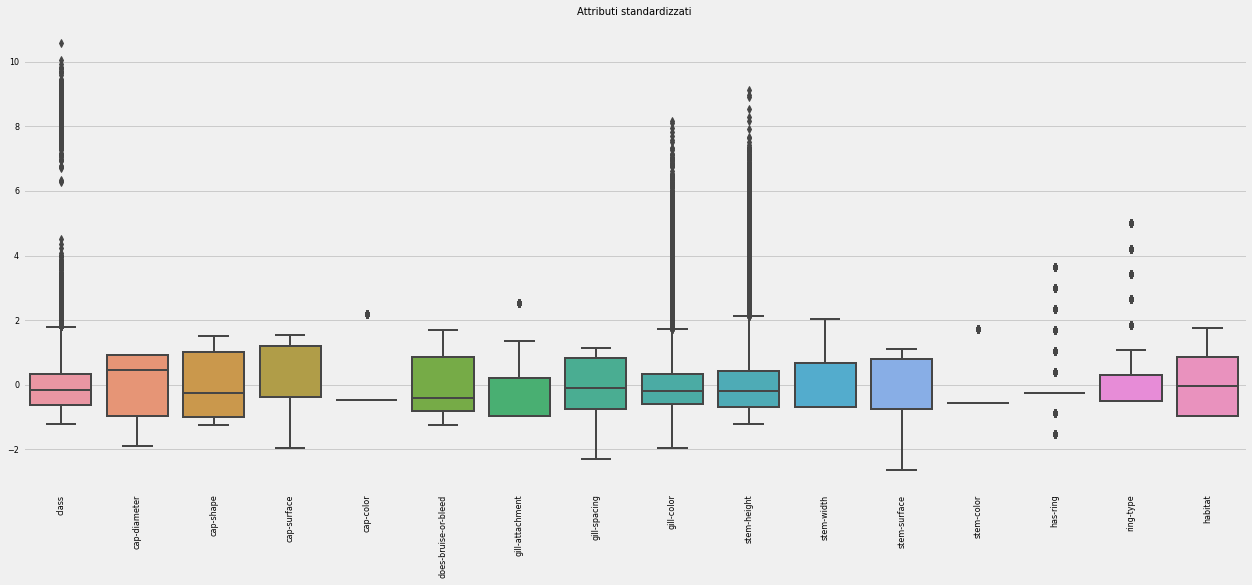

In [90]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_std = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

fig = sns.catplot(data=x_train_std , kind='box' , size=7, aspect=2.5).set(title='Attributi standardizzati')
fig.set_xticklabels(df.columns,rotation=90)


###Feature Selection: Mutual Information

Prima di poter procedere con la classificazione é importante andare a selezionare gli attributi che hanno una maggior rilevanza per la predizione finale. Proprio a tal fine possiamo utilizzare il concetto di **mutua informazione**, cioè la valutazione di quanto la presenza di un attributo migliori o meno la nostra conoscenza.

Andiamo quindi a confrontare la probabilità congiunta dell'elemento con la classe rispetto al prodotto delle probabilità.

La funzione che calcola la mutua informazione di un termine $t$ rispetto alla classe $C$ è 

$$\sum_{C_0,C_1}\sum_{t=0,1} p(C,t)\log\frac{p(C,t)}{p(C)p(t)}=\sum_{C_0,C_1}\sum_{t=0,1} p(t|C)p(C)\log\frac{p(t|C)p(C)}{p(C)p(t)}$$

Se la probabilità congiunta e il prodotto delle probabilità sono molto simili ($log(1) = 0$) l'informazione tende a zero, quindi i termini sono tra loro indipendenti.

Andiamo quindi a stampare il valore della mutua informazione per ogni feature.

In [91]:
mi = mutual_info_classif(x_train_std, y_train)
dmi = pd.DataFrame(mi, index=x.columns, columns=['mi']).sort_values(by='mi', ascending=False)
dmi

,mi
stem-width,0.063675
stem-surface,0.044465
stem-color,0.043763
stem-height,0.042998
cap-color,0.032641
cap-surface,0.030635
ring-type,0.028666
cap-diameter,0.027853
gill-attachment,0.023425
habitat,0.020995


Seleziono le prime 10 features, che dovrebbero essere le più significative.

In [92]:
fc = SelectKBest(mutual_info_classif).fit(x_train_std, y_train)

# applico la feature selection
features = x_train_std.columns
features_selected = x_train_std.columns[fc.get_support()]

#x_mi = pd.DataFrame(fc.transform(x), columns=features_selected)
x_train_mi = pd.DataFrame(fc.transform(x_train_std), columns=features_selected)
x_test_mi = pd.DataFrame(fc.transform(x_test_std), columns=features_selected)

In [93]:
print('Attributi iniziali: \n', list(features), '\nAttributi selezinati: \n', list(features_selected))

Attributi iniziali: 
 ['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'] 
Attributi selezinati: 
 ['cap-diameter', 'cap-surface', 'cap-color', 'gill-attachment', 'stem-height', 'stem-width', 'stem-surface', 'stem-color', 'ring-type', 'habitat']


###Matrice di Confusione e Score


Per capire come si sta comportando il classificatore andremo ad analizzare diverse tipologie di errori:
* **TP** *True positive*: funghi commestibili (classe 0) correttamente classificati  
* **TN** *True negative*: funghi velenosi (classe 1) correttamente classificati 
* **FP** *False positive*: funghi velenosi (classe 1) classificati come commestibili (classe 0)
* **FN** *False negative*: funghi commestibili (classe 0) classificati come velenosi (classe 1)

Questi valori possono essere riportati all'interno di una **matrice di confusione**, cioé una matrice $C$ tale che ogni valore $C(i, j)$ sia pari al numero di osservazioni che dovrebbero essere attribuite ad $i$, ma che sono state attribuite alla classe $j$.
Quindi le righe corrispondono alle classi, mentre le colonne alle predizioni.

Inoltre, è importante andare a valutare la predizione effettuata in base a diversi punteggi:
* **Precision** è definita come il rapporto tra gli elementi correttamente predetti come commestibili e l'insieme degli elementi predetti come commestibili, a prescindere dalla correttezza.
$$P=\frac{TP}{TP+FP}$$
* **Recall** definita come il rapporto tra gli elementi correttamente predetti come commestribili e il totale degli elementi commestibili, a prescindere dalla predizione. 
$$R=\frac{TP}{TP+FN}$$
* **Accuracy** è definita come il rapporto tra fli elementi classificati correttamente rispetto al numero totale degli elementi
$$A=\frac{TP+TN}{TP+TN+FP+FN}$$

Per semplificare i passaggi successivi utilizzeremo la seguente funzione `plt_confusion_score()` per stampare per ciascun classificatore la matrice di confusione ed i relativi punteggi.

In [94]:
def plt_confusion_score(clf, predictions):
  cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
  plt.figure(figsize=(14,3))
  hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='d',annot_kws={'size': 14},
                 cmap = sns.color_palette("PuBu", 10))
  plt.ylabel('Valore corretto');
  plt.xlabel('Valore predetto');
  plt.tight_layout()
  plt.show()
  print('Precision = {0:5.4f}'.format(precision_score(y_test, predictions)))
  print('Recall = {0:5.4f}'.format(recall_score(y_test, predictions)))
  print('Accuracy = {0:5.4f}'.format(accuracy_score(y_test, predictions)))

##Classificazione Lineare

La classificazione lineare permette di classificare un insieme discreto di valori suddividendo lo spazio assegnato ad ogni classe mediante **equazioni lineari**. Nel nostro caso le classi sono disgiunte, un fungo può essere commestibile o velenoso, ma non sappiamo se il dataset è linearmente separabile, cioè se si possono rappresentare le due classi dividendo il dataset tramite un iperpiano di separazione.

Esistono tre approcci per la classificazione lineare:
* *Discriminativo Geometrico*: ha l'obiettivo di discriminare la classe di appartenenza di ogni elemento andando a cercare l'iperpiano di separazione tra le classi. Questo è un approccio funzionale, quindi sfrutta la minimizzazione del rischio empirico.
* *Discriminativo Probabilistico*: ha l'obiettivo di assegnare ad ogni elemento la distribuzione di probabilità di appartenere a ciascuna classe. In questo modo ogni elemento apparterrà alla classe con probabilità maggiore.
* *Generativo*: ha l'obiettivo di rappresentare al meglio le diverse classi sfruttando la regola di Bayes per ricercare le distribuzione di probabilità migliore per ciascuna classe.

###Logistic Regression


La logistic regression è un **Modello Lineare Generalizzato** in cui la funzione di attivazione non lineare utilizzata è la **sigmoide** (o **funzione logistica**).
$$p(C_1|x)=σ(\textbf{w}^T \textbf{x})=\frac{1}{1+e^{\textbf{w}^T \bar{\textbf x}}}$$



In [95]:
clf = LogisticRegression()

start = datetime.datetime.now()
model = clf.fit(x_train_std, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_std)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:00.085990
Testing Time :  0:00:00.002787


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

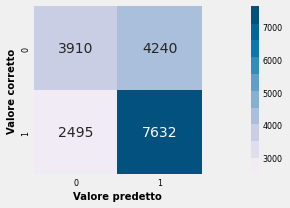

Precision = 0.6429
Recall = 0.7536
Accuracy = 0.6315


In [96]:
plt_confusion_score(clf, predictions)

####LR con Feature Selection

In [97]:
clf = LogisticRegression()

start = datetime.datetime.now()
model = clf.fit(x_train_mi, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_mi)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:00.066451
Testing Time :  0:00:00.006937


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

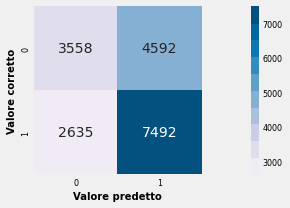

Precision = 0.6200
Recall = 0.7398
Accuracy = 0.6046


In [98]:
plt_confusion_score(clf, predictions)

Utilizzando la feature selection le prestazioni variano leggermente.

###Support Vector Machine

La **Support Vector Machine** è un metodo di classificazione lineare parametrico, che utilizza un approccio **discriminativo geometrico**, il cui obiettivo è infatti quello di cercare un iperpiano di separazione tra le classi. Questo metodo è pensato proprio per la classificazione binaria, permette infatti di trovare l'iperpiano di separazione esatto se le classi sono linearmente separabili, o di trovare il migliore iperpiano nel caso non lo siano. 

Nel caso di classi linearmente separabili, presi più iperpiani di separazione viene preferito quello per cui l'elemento più vicino al piano ha distanza maggiore ᵧ. Questo significa che intorno all'iperpiano ci sarà una fascia larga 2γ in cui non ci sono elementi del training set. Gli elementi che si trovano nello spazio proprio sul confine di questa fascia vengono chiamati **vettori di supporto** e sono i più vicini all'iperpiano, gli iperpiani che passano per questi vettori di supporto sono chiamati **margini**.

Se invece il training set non è separabile, come probabilmente accade nel nostro caso, è necessario introdurre un costo nel nostro problema di ottimizzazione vincolato che penalizza gli elementi classificati male.

In [99]:
clf = svm.SVC()

start = datetime.datetime.now()
model = clf.fit(x_train_std, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_std)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)


Training Time :  0:00:22.020831
Testing Time :  0:00:07.247500


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

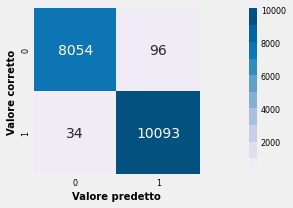

Precision = 0.9906
Recall = 0.9966
Accuracy = 0.9929


In [100]:
plt_confusion_score(clf, predictions)

####SVM con Feature Selection

In [101]:
clf = svm.SVC()

start = datetime.datetime.now()
model = clf.fit(x_train_mi, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_mi)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:31.338552
Testing Time :  0:00:13.900251


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

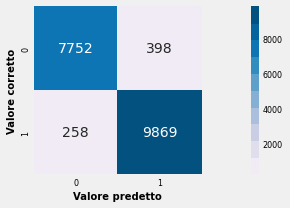

Precision = 0.9612
Recall = 0.9745
Accuracy = 0.9641


In [102]:
plt_confusion_score(clf, predictions)

Anche in questo caso la feature selection peggiorà un po' l'accuratezza, senza avere un grande impatto sulle prestazioni.

##K-Nearest Neighbors


Il k-Nearest Neighbors è un metodo di apprendimento supervisionato **non parametrico**. L'idea alla base della kNN è quella di considerare la più piccola regione intorno al valore $x$ contenente k elementi, quindi una sfera.

Per classificare $x$ determiniamo la classe dei k elementi del training set più vicini e assegnamo ad $x$ la classe maggioritaria.


In [103]:
accuracy = []
neighbors = []

for i in range(3, 200, 40):
    neighbors.append(i)
print("Numero di k presi in considerazione: ", len(neighbors))

for i in range(len(neighbors)):
    clf = KNN(n_neighbors=neighbors[i], n_jobs=-1)

    model = clf.fit(x_train_std, y_train)
    score = clf.score(x_test_std, y_test)
    print("n_neighbors: ", neighbors[i], " -> Accuracy: ", score*100)

    accuracy.append(score*100)


Numero di k presi in considerazione:  5
n_neighbors:  3  -> Accuracy:  99.99452864255622
n_neighbors:  43  -> Accuracy:  98.71970235815506
n_neighbors:  83  -> Accuracy:  97.417519286535
n_neighbors:  123  -> Accuracy:  96.5421020955299
n_neighbors:  163  -> Accuracy:  96.22476336379056


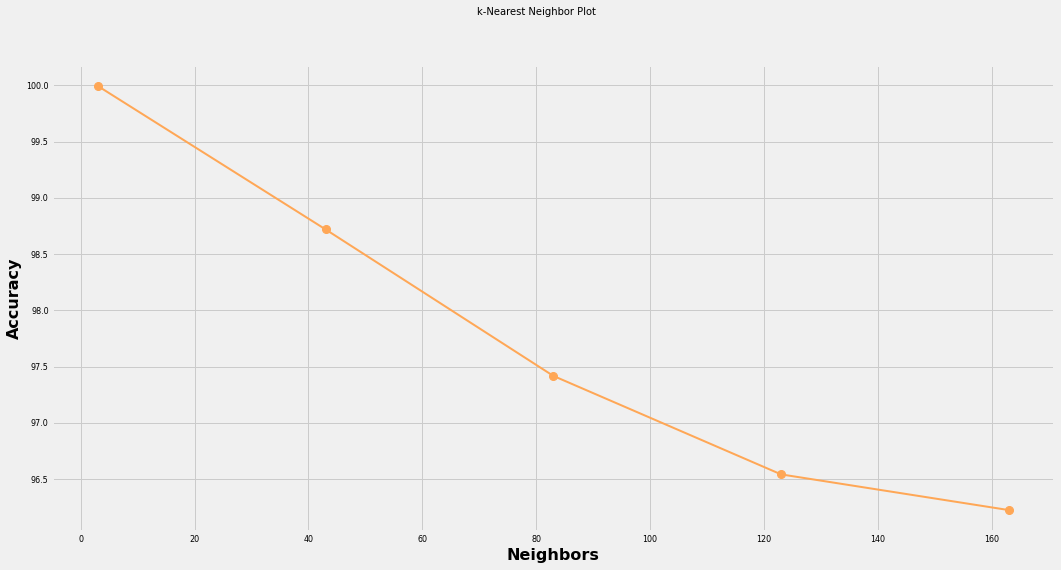

In [104]:
plt.figure(2)
plt.suptitle('k-Nearest Neighbor Plot', fontsize=10)
plt.plot(neighbors, accuracy, '-o')
plt.xlabel('Neighbors', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

Dai dati ottenuti sembra che il valore migliore sia $k=3$, quindi eseguiamo il training nuovamente con questo valore per ottenere le statistiche.

In [105]:
clf = KNN(n_neighbors=3, n_jobs=-1)

start = datetime.datetime.now()
model = clf.fit(x_train_std, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_std)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)


Training Time :  0:00:00.006938
Testing Time :  0:00:22.749232


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

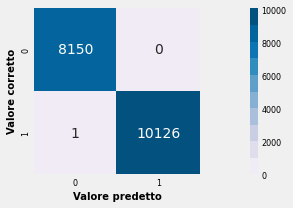

Precision = 1.0000
Recall = 0.9999
Accuracy = 0.9999


In [106]:
plt_confusion_score(clf, predictions)

Questo modello sembra comportarsi molto bene.

####kNN con Feature Selection

In [107]:
clf = KNN(n_neighbors=3, n_jobs=-1)

start = datetime.datetime.now()
model = clf.fit(x_train_mi, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_mi)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:00.072743
Testing Time :  0:00:01.031471


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

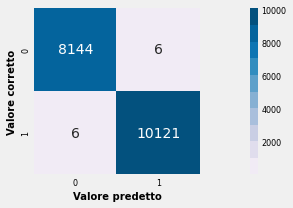

Precision = 0.9994
Recall = 0.9994
Accuracy = 0.9993


In [108]:
plt_confusion_score(clf, predictions)

La feature selection sembra avere esattamente gli stessi risultati dell'utilizzo di tutte le features.

##Reti Neurali (Multi-layer Perceptron)


Il **Multi-layer perceptron** (o **precettrone multistrato**) è la tipologia più semplice di rete neurale, in cui si susseguono strati di percettroni, i quali sono connessi a tutti i nodi dello strato successivo. Questa rete permette, a partire da $d$ valori entranti di estrarne $d_1$ attraverso una combinazione lineare. Ogni nodo è collegato ad una funzione di attivazione lineare che permette la trasformazione nell'output e ad ogni arco dal percettrone alla funzione di attivazione viene associato un peso. La computazione segue quindi un'unica direzione (**feed forward**). Il Percettrone multistrato usa una tecnica di apprendimento supervisionato chiamata backpropagation per l'allenamento della rete.

Essendo il modello molto lento da addestrare andremo ad utilizzare una rete neurale a 3 livelli:
* Input layer
* Hidden layer
* Output layer

Andiamo per prima cosa a valutare quanti neuroni sono necessari nel layer nascosto per avere buone prestazioni.

In [109]:
neuroni = [] 
accuracy = [] 

for i in range(50, 400, 100):
    neuroni.append(i)
print("Numero di reti prese in considerazione: ", len(neuroni))

for i in range(len(neuroni)):
    clf = MLPClassifier(hidden_layer_sizes=neuroni[i], random_state=1, max_iter=300)

    model = clf.fit(x_train_std, y_train)
    score = clf.score(x_test_std, y_test)

    print("estimators: ", neuroni[i], " -> Accuracy: ", score*100)

    accuracy.append(score*100)


Numero di reti prese in considerazione:  4
estimators:  50  -> Accuracy:  99.96170049789353
estimators:  150  -> Accuracy:  99.97811457022488
estimators:  250  -> Accuracy:  99.97811457022488
estimators:  350  -> Accuracy:  99.96170049789353


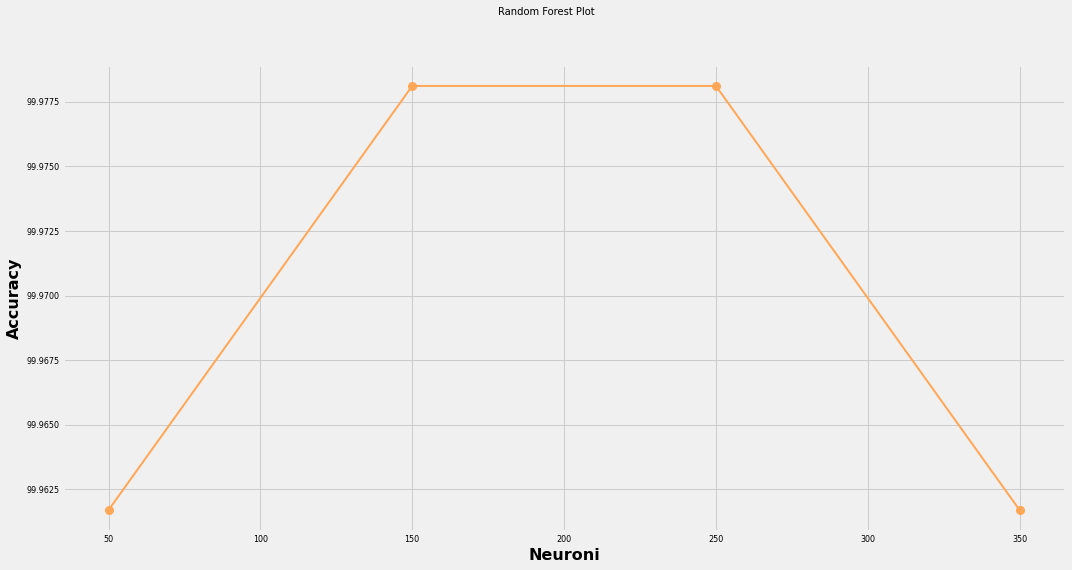

In [110]:
plt.figure(1)
plt.suptitle('Random Forest Plot', fontsize=10)
plt.plot(neuroni, accuracy, '-o')
plt.xlabel('Neuroni', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

Osservando i dati scelgo di considerare un numero di neuroni per l'hidden layer pari a 150.

In [111]:
clf = MLPClassifier(hidden_layer_sizes=150, random_state=1, max_iter=300)

start = datetime.datetime.now()
model = clf.fit(x_train_std, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = clf.predict(x_test_std)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:55.124430
Testing Time :  0:00:00.095862


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

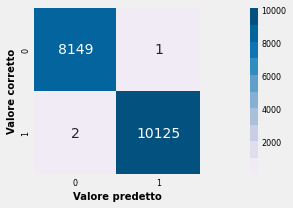

Precision = 0.9999
Recall = 0.9998
Accuracy = 0.9998


In [112]:
plt_confusion_score(clf, predictions)

####MLP con Feature Selection

In [113]:
clf = MLPClassifier(hidden_layer_sizes=150, random_state=1, max_iter=300)

start = datetime.datetime.now()
model = clf.fit(x_train_mi, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_mi)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:01:56.528236
Testing Time :  0:00:00.082919


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

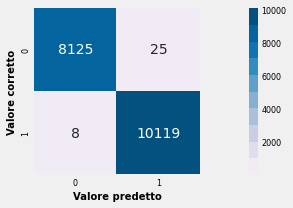

Precision = 0.9975
Recall = 0.9992
Accuracy = 0.9982


In [114]:
plt_confusion_score(clf, predictions)

Utilizzando la feature selection l'accuratezza rimane pressochè invariata.

##Metodi Ensemble

A differenza dei metodi di classificazione precedenti che prevedeno l'utilizzo di un unico classificatore al fine di restituire la classe di appartenenza, per quanto riguarda i **metodi ensemble** si utilizza il risultato della combinazione di più classificatori costruiti in modo diverso.

Questi metodi si suddividono in due sottogruppi:
* **Bagging** che prevede la costruzione di un comitato di predittori dello stesso tipo, ma non identici, passando ad ognuno una sottoparte del training set e facendo poi la media dei risultati dei diversi predittori. Nel caso in cui gli elementi non siano abbastanza per avere un buon training set per ogni predittore si utilizza il campionamento con ripetizione (**bootstrap**).
* **Boosting** che prevede la costruzione di predittori deboli in modo iterativo. Costruisco il primo predittore, ne valuto la precisione ed in base a dove sbaglia il primo ne costruisco un secondo, poi osservando i primi due ne costruisco un terzo che classifica meglio i punti in cui gli altri sbagliano, e così via.La classificazione finale viene poi fatta tramite una composizione dei risultati dei classificatori, ai quali è possibile anche dare pesi diversi.

###Random Forest


Un esempio molto diffuso di **bagging** è quello delle **Random Forest**, che utilizza un ensemble di alberi di decisione diversi tra loro. Per rendere i classificatori diversi si estrae un campione applicando il bootstrape al training set e si fa crescere un albero di decisione $T_b$ scegliendo casualmente le $m$ features su cui basarci e utilizzando la migliore di queste per fare lo split dell'albero.

In [123]:
estimators = [] 
accuracy = [] 

for i in range(2, 200, 20):
    estimators.append(i)
print("Numero di alberi decisionali presi in considerazione: ", len(estimators))

for i in range(len(estimators)):
    clf = RandomForestClassifier(n_estimators=estimators[i], n_jobs=-1)

    model = clf.fit(x_train_std, y_train)
    score = clf.score(x_test_std, y_test)

    print("estimators: ", estimators[i], " -> Accuracy: ", score*100)

    accuracy.append(score*100)


Numero di alberi decisionali presi in considerazione:  10
estimators:  2  -> Accuracy:  99.4856924002845
estimators:  22  -> Accuracy:  99.98358592766866
estimators:  42  -> Accuracy:  99.98358592766866
estimators:  62  -> Accuracy:  99.97811457022488
estimators:  82  -> Accuracy:  99.98358592766866
estimators:  102  -> Accuracy:  99.98905728511244
estimators:  122  -> Accuracy:  99.98358592766866
estimators:  142  -> Accuracy:  99.97811457022488
estimators:  162  -> Accuracy:  99.97811457022488
estimators:  182  -> Accuracy:  99.97811457022488


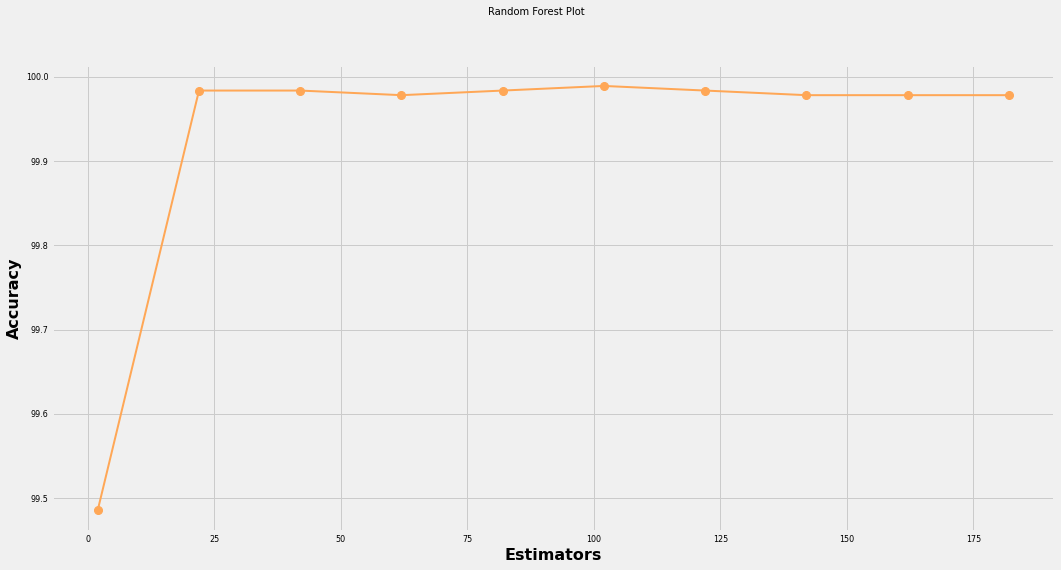

In [124]:
plt.figure(1)
plt.suptitle('Random Forest Plot', fontsize=10)
plt.plot(estimators, accuracy, '-o')
plt.xlabel('Estimators', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

Attenendoci ai dati osservati un buon valore per il numero di alberi decisionali può essere il valore 22.

In [125]:
clf = RandomForestClassifier(n_estimators=22, n_jobs=-1)

start = datetime.datetime.now()
model = clf.fit(x_train_std, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_std)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:00.820341
Testing Time :  0:00:00.063465


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

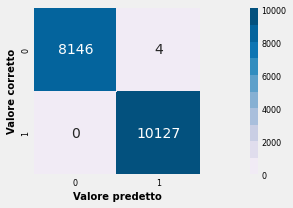

Precision = 0.9996
Recall = 1.0000
Accuracy = 0.9998


In [126]:
plt_confusion_score(clf, predictions)

####RFC con Feature Selection

In [127]:
clf = RandomForestClassifier(n_estimators=22, n_jobs=-1)

start = datetime.datetime.now()
model = clf.fit(x_train_mi, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_mi)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:00.811430
Testing Time :  0:00:00.051858


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

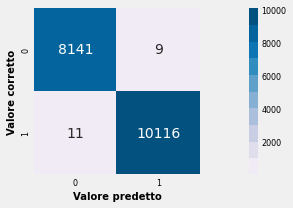

Precision = 0.9991
Recall = 0.9989
Accuracy = 0.9989


In [128]:
plt_confusion_score(clf, predictions)

Utilizzando la feature selection l'accuratezza pè pressochè invariata.

###AdaBoost

Un esempio di **boosting** è l'**Adaptive Boosting** (AdaBoost) nel quale i modelli vengono addestrati in sequenza utilizzando una forma pesata del dataset, dove il peso degli elementi del dataset dipende dalle prestazioni dei modelli precedenti (il peso è più alto se i modelli precedenti tendevano a classificare male quel particolare elemento).

Ogni classificatore cerca di compensare gli errori dei precedenti ed infine viene fatta la somma delle diverse predizioni, per questo vengono chiamati modelli additivi.

Il metodo che andrà ad eseguire Adaboost nel caso della nostra classificazione binaria è il seguente:
1. Tutti i pesi vengono inizializzati a $w_i^{(0)} = 1/n$
2. Iterativamente per $j$ che va da $1$ a $m$ addestro un weak learner $y_i(x)$ in modo da minimizzare il peso complessivo degli elementi classificati male 
3. Indicando con $E^{(j)}$ l'insieme degli elementi del j-esimo classificatore che sono stati classificati male e con $e^{(j)}$ il rapporto tra il peso degli elementi classificati male rispetto al peso di tutti gli elementi, cioè
$$e^{(j)} = \frac{\sum_{x_i \in \xi^{(j)}} w_i^{(j)}}{\sum_{i} w_i^{(j)}}$$

Se $e^{(j)} >1/2$ significa che il classificatore si comporta talmente male che conviene invertirne il comportamento.

In [129]:
depth = [] 
accuracy = [] 

for i in range(3, 30, 3):
    depth.append(i)
print("Numero di classificatori presi in considerazione: ", len(depth))

for i in range(len(depth)):
    clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = depth[i]))

    model = clf.fit(x_train_std, y_train)
    score = clf.score(x_test_std, y_test)

    print("Profondità alberi: ", depth[i], " -> Accuracy: ", score*100)

    accuracy.append(score*100)


Numero di classificatori presi in considerazione:  9
Profondità alberi:  3  -> Accuracy:  99.75378891502982
Profondità alberi:  6  -> Accuracy:  99.99452864255622
Profondità alberi:  9  -> Accuracy:  99.99452864255622
Profondità alberi:  12  -> Accuracy:  99.99452864255622
Profondità alberi:  15  -> Accuracy:  100.0
Profondità alberi:  18  -> Accuracy:  99.99452864255622
Profondità alberi:  21  -> Accuracy:  100.0
Profondità alberi:  24  -> Accuracy:  99.62794769382283
Profondità alberi:  27  -> Accuracy:  99.64983312359796


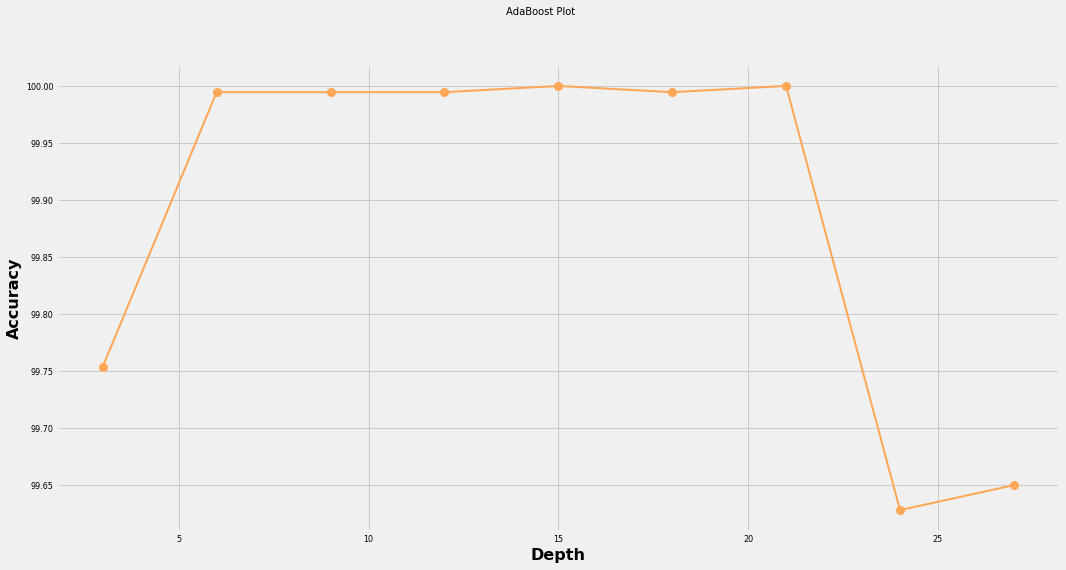

In [130]:
plt.figure(1)
plt.suptitle('AdaBoost Plot', fontsize=10)
plt.plot(depth, accuracy, '-o')
plt.xlabel('Depth', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()

Attenendoci ai dati osservati un buon valore per il numero di alberi decisionali può essere il valore 6.

In [131]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6))

start = datetime.datetime.now()
model = clf.fit(x_train_std, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_std)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:09.176922
Testing Time :  0:00:00.181055


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

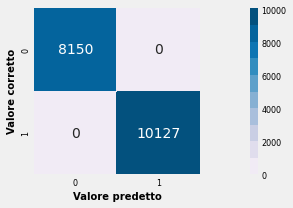

Precision = 1.0000
Recall = 1.0000
Accuracy = 1.0000


In [132]:
plt_confusion_score(clf, predictions)

####AB con Feature Selection

In [133]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 6))

start = datetime.datetime.now()
model = clf.fit(x_train_mi, y_train)
end = datetime.datetime.now()
print('Training Time : ', end-start)

start = datetime.datetime.now()
predictions = model.predict(x_test_mi)
end = datetime.datetime.now()
print ('Testing Time : ', end-start)

Training Time :  0:00:07.139723
Testing Time :  0:00:00.185479


Andiamo a vedere la **matrice di confusione** ed i relativi punteggi.

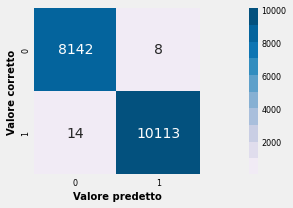

Precision = 0.9992
Recall = 0.9986
Accuracy = 0.9988


In [134]:
plt_confusion_score(clf, predictions)

Anche in questo caso la feature selection non peggiora quasi per nulla l'accuratezza del modello.

##Conclusioni

Dalle predizioni effettuate è semplice notare che pur avendo buone prestazioni i metodi di classificazione lineare sono quelli che risultano meno efficaci nel predire la classe corretta, soprattutto se confrontati con gli altri 4 metodi che hanno invece prestazioni eccellenti.

Notiamo, inoltre, che i metodi di classificazione considerati reagiscono molto bene all'utilizzo della feature selection, che non riduce di molto la qualità delle predizioni, ma potrebbe velocizzare notevolmente il training ed il testing nel caso di dataset più grandi.